In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
img_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

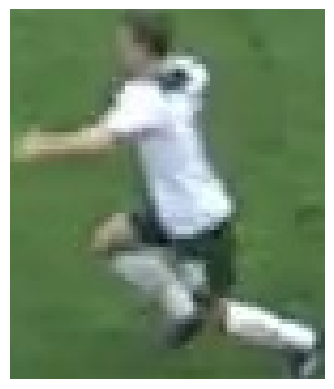

In [4]:
plt.imshow(image)
plt.axis("off")
plt.show()

## Take the top haft of the image

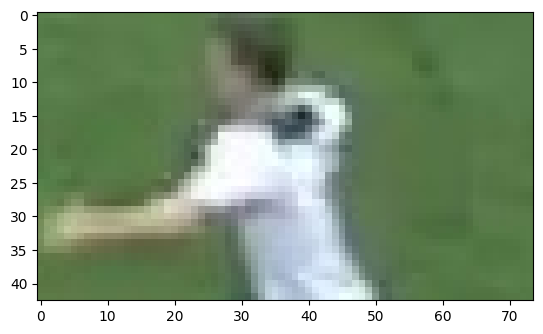

In [6]:
top_half_image = image[0: int(image.shape[0]/ 2), :]
plt.imshow(top_half_image)
plt.show()

## Cluster the image into 2 clusters

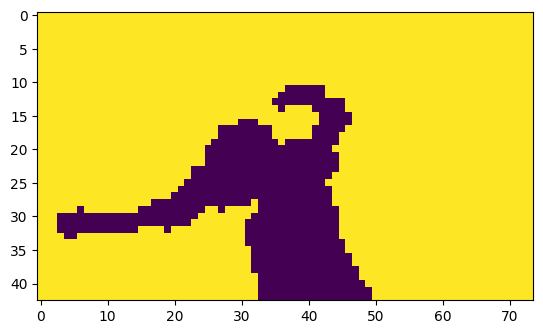

In [10]:
#Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

#Perform k means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#Get the cluster labels
labels = kmeans.labels_

#Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [11]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [12]:
print(corner_clusters)

[1, 1, 1, 1]


In [13]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


0

In [17]:
kmeans.cluster_centers_[player_cluster]

array([198.69479354, 209.005386  , 211.68222621])